# Credit Risk Analysis Project

## Introduction

Credit risk analysis is a crucial process in the financial industry, where the goal is to assess the likelihood that a borrower will default on a loan. Accurate prediction of credit risk enables financial institutions to make informed decisions, mitigate potential losses, and maintain a healthy portfolio.

This project aims to develop a predictive model that evaluates credit risk based on a dataset containing key financial and demographic features. The dataset includes the following columns:

- **Age**: The age of the borrower.
- **Income**: The annual income of the borrower.
- **LoanAmount**: The amount of the loan applied for.
- **CreditScore**: The credit score of the borrower, indicating their creditworthiness.
- **LoanTerm**: The duration of the loan in months.
- **EmploymentYears**: The number of years the borrower has been employed.
- **DebtToIncomeRatio**: The ratio of the borrower's total monthly debt payments to their monthly income.
- **NumOfCreditLines**: The total number of credit lines the borrower has.
- **NumOfOpenCreditLines**: The number of currently active credit lines.
- **RiskScore**: A score that quantifies the risk associated with lending to the borrower.

## Objective

The primary objective of this project is to build a robust machine learning model that can accurately predict the credit risk associated with a borrower, based on the provided features. This model will help in identifying high-risk borrowers, thus enabling proactive risk management and decision-making in lending practices.

## Approach

The project will involve the following steps:
1. **Exploratory Data Analysis (EDA)**: Understand the dataset's structure, identify patterns, and visualize relationships between variables.
2. **Data Preprocessing**: Handle missing values, normalize features, and prepare the data for modeling.
3. **Feature Engineering**: Create new features or modify existing ones to improve model performance.
4. **Model Development**: Experiment with various machine learning algorithms to build and evaluate predictive models.
5. **Model Evaluation**: Assess model performance using appropriate metrics and validate results.
6. **Conclusion**: Summarize findings, interpret model outputs, and discuss potential improvements.

Let's begin by exploring the dataset to understand its characteristics.


## Loading the Data 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
credit_risk_df = pd.read_csv('credit_risk_dataset.csv')

print(credit_risk_df.head())

   Age  Income  LoanAmount  CreditScore  LoanTerm  EmploymentYears  \
0   56  125186       19546          667        23               25   
1   69   54674       20129          519        22               29   
2   46   55854        2591          636        48               12   
3   32   66271       12303          522        36               12   
4   60   93688       31561          659        29                1   

   DebtToIncomeRatio  NumOfCreditLines  NumOfOpenCreditLines  RiskScore  
0           0.463207                 9                     3  31.024116  
1           0.258525                 1                     3  12.329603  
2           0.218530                 5                     1  16.233910  
3           0.157388                 9                     1  17.066046  
4           0.160578                 4                     2  22.219351  


## Exploratory Data Analysis

In [17]:
# Display basic statistics
print(credit_risk_df.describe())

# Check for missing values
print(credit_risk_df.isnull().sum())

              Age         Income    LoanAmount  CreditScore     LoanTerm  \
count  1000.00000    1000.000000   1000.000000    1000.0000  1000.000000   
mean     43.81900   84905.976000  26204.791000     580.3800    35.288000   
std      14.99103   38430.889006  13890.580985     158.8271    13.939202   
min      18.00000   20060.000000   1105.000000     300.0000    12.000000   
25%      31.00000   51945.500000  13656.500000     442.7500    23.000000   
50%      44.00000   84699.000000  27149.000000     577.5000    35.000000   
75%      56.00000  117858.000000  37460.000000     720.2500    47.000000   
max      69.00000  149972.000000  49938.000000     849.0000    59.000000   

       EmploymentYears  DebtToIncomeRatio  NumOfCreditLines  \
count      1000.000000        1000.000000       1000.000000   
mean         19.758000           0.298159          4.938000   
std          11.345049           0.115416          2.562562   
min           0.000000           0.100091          1.000000   


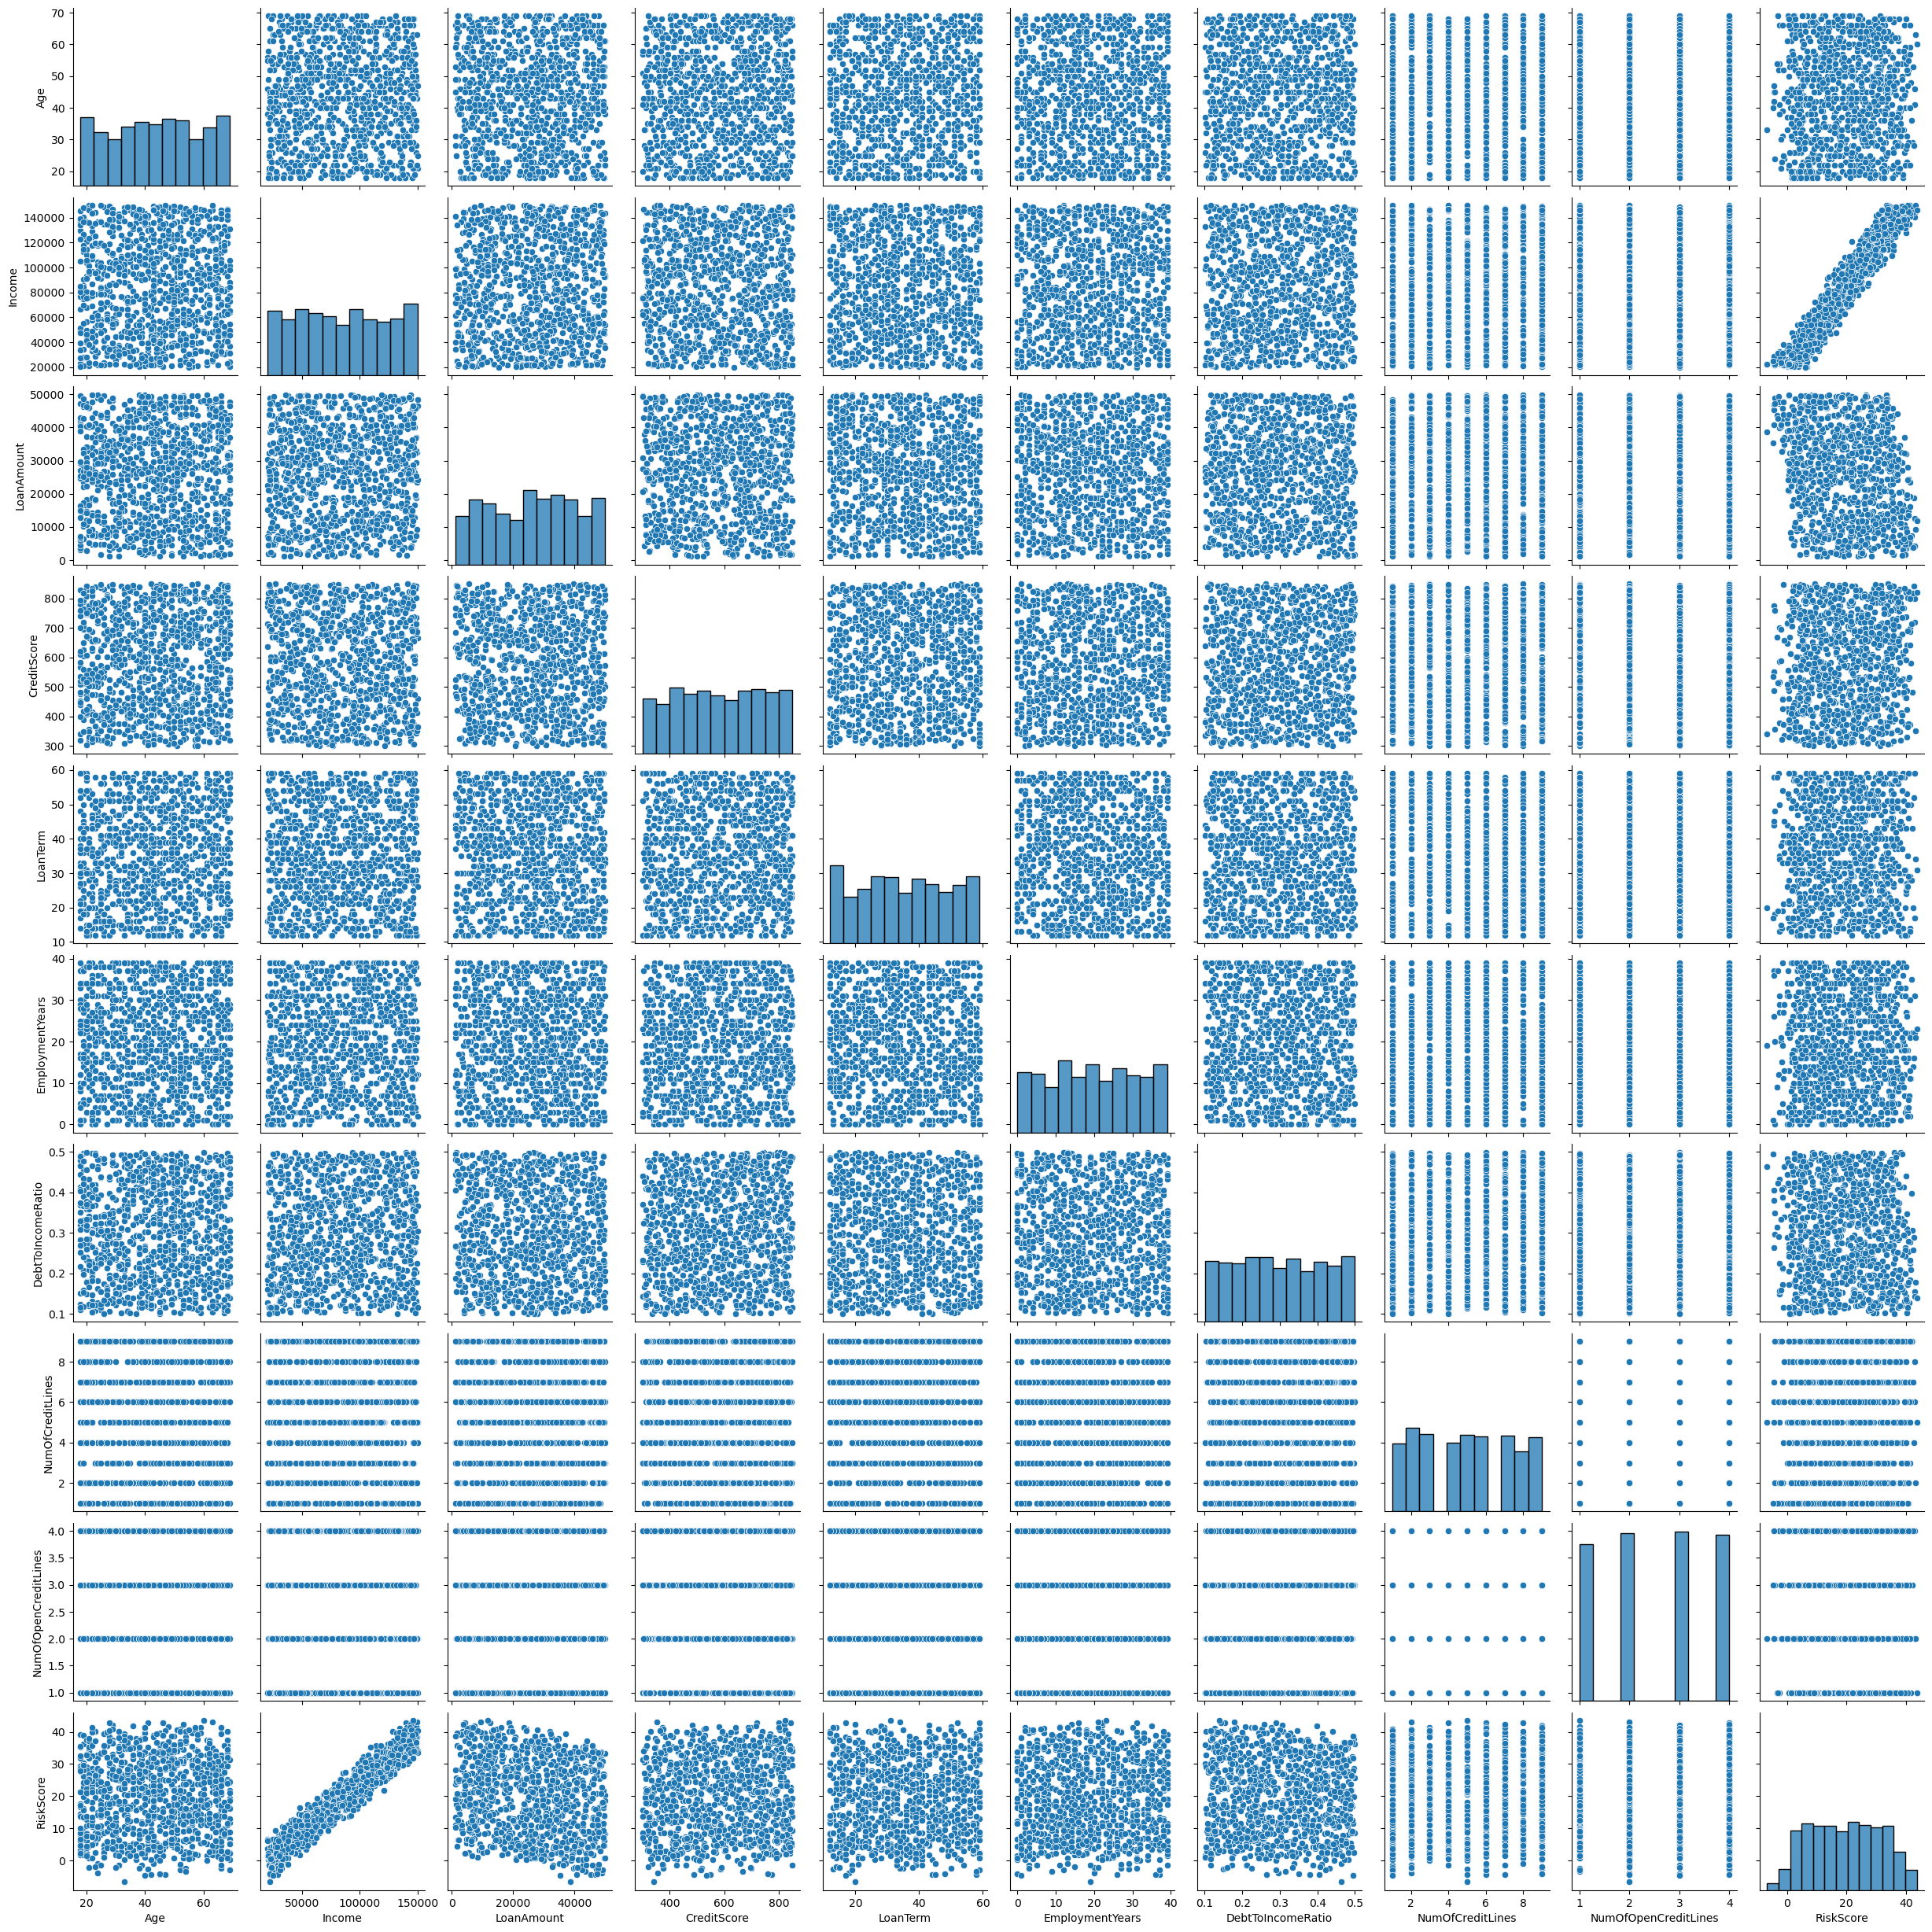

In [13]:
# Plotting pairplot to see relationships between variables
sns.pairplot(credit_risk_df)
plt.show()

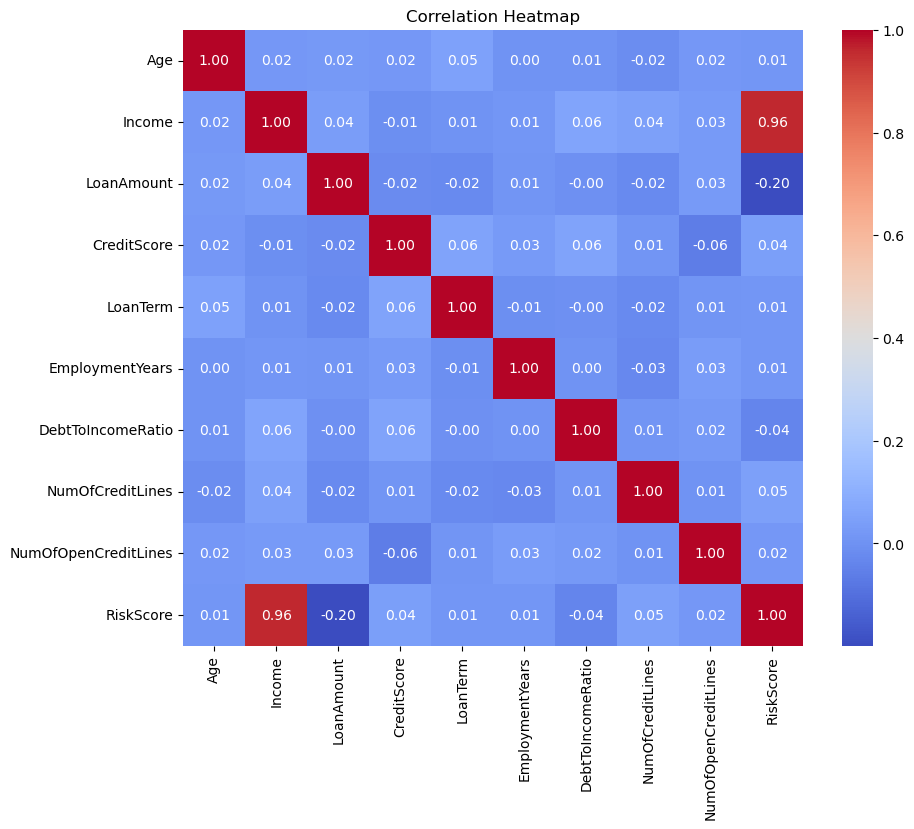

In [14]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(credit_risk_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering and Modeling

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Load the dataset
df = pd.read_csv('credit_risk_dataset.csv')

# Feature engineering
df['Income_to_Loan_Ratio'] = df['Income'] / df['LoanAmount']
df['Credit_Utilization'] = df['NumOfOpenCreditLines'] / df['NumOfCreditLines']
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100], labels=['Young', 'Middle', 'Senior', 'Elderly'])
df['Credit_Score_Group'] = pd.cut(df['CreditScore'], bins=[0, 580, 670, 740, 850], labels=['Poor', 'Fair', 'Good', 'Excellent'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Age_Group', 'Credit_Score_Group'])

# Prepare features and target
X = df_encoded.drop(['RiskScore'], axis=1)
y = df_encoded['RiskScore']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

# Train and evaluate models
results = []
for name, model in tqdm(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2': r2})

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
print(results_df)

# Find the best model
best_model = results_df.loc[results_df['R2'].idxmax()]
print(f"\
Best model: {best_model['Model']}")
print(f"R2 Score: {best_model['R2']:.4f}")
print(f"MSE: {best_model['MSE']:.4f}")



100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

               Model        MSE        R2
0  Linear Regression   1.263926  0.990660
1   Ridge Regression   1.258448  0.990700
2   Lasso Regression   4.747354  0.964918
3      Random Forest   2.291459  0.983067
4  Gradient Boosting   1.779062  0.986853
5                SVR  16.579408  0.877483
Best model: Ridge Regression
R2 Score: 0.9907
MSE: 1.2584


So the Ridge Rgression model is our best model achieving R2 of 0.99 and MSE of 1.26 

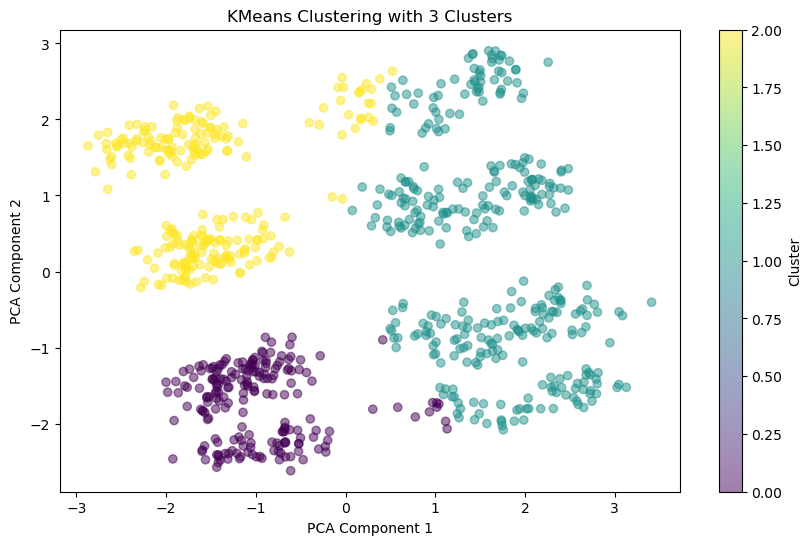

In [24]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



              Age    Income  LoanAmount  CreditScore  LoanTerm  \
Cluster                                                          
0        0.916129  0.065413    0.060666    -0.781777  0.026310   
1        0.081220 -0.006156   -0.061268     0.945201  0.070816   
2       -0.869427 -0.044636    0.039665    -0.738262 -0.124888   

         EmploymentYears  DebtToIncomeRatio  NumOfCreditLines  \
Cluster                                                         
0               0.026727          -0.018244          0.003914   
1               0.031871           0.070956          0.091630   
2              -0.068408          -0.088572         -0.136898   

         NumOfOpenCreditLines  Income_to_Loan_Ratio  Credit_Utilization  \
Cluster                                                                   
0                    0.067344             -0.056360            0.010606   
1                   -0.103484              0.079284           -0.120661   
2                    0.095785             -

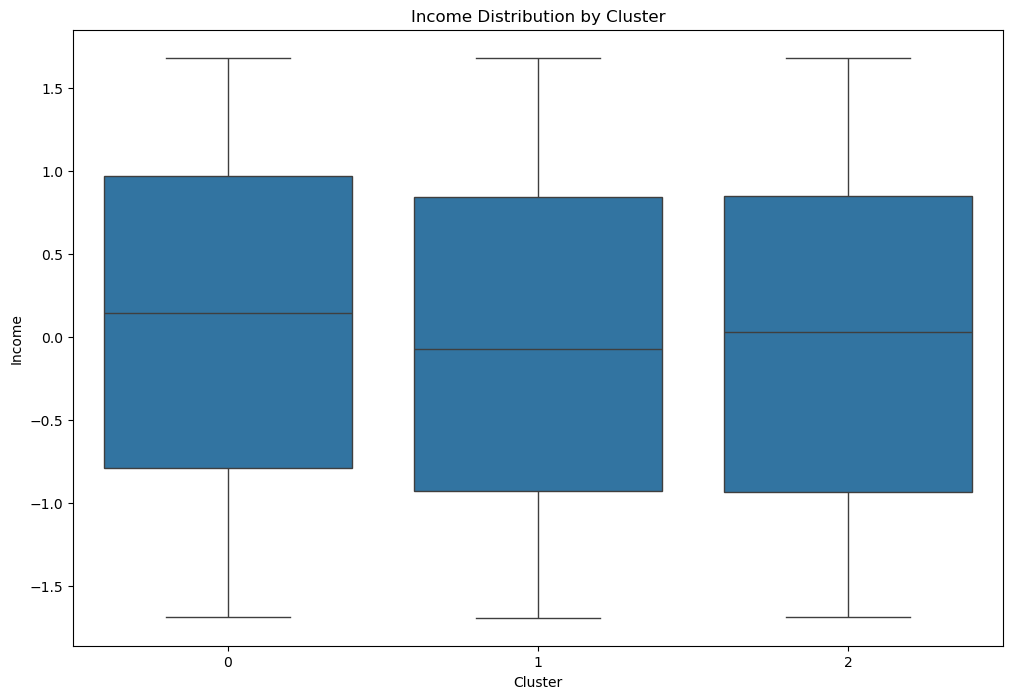

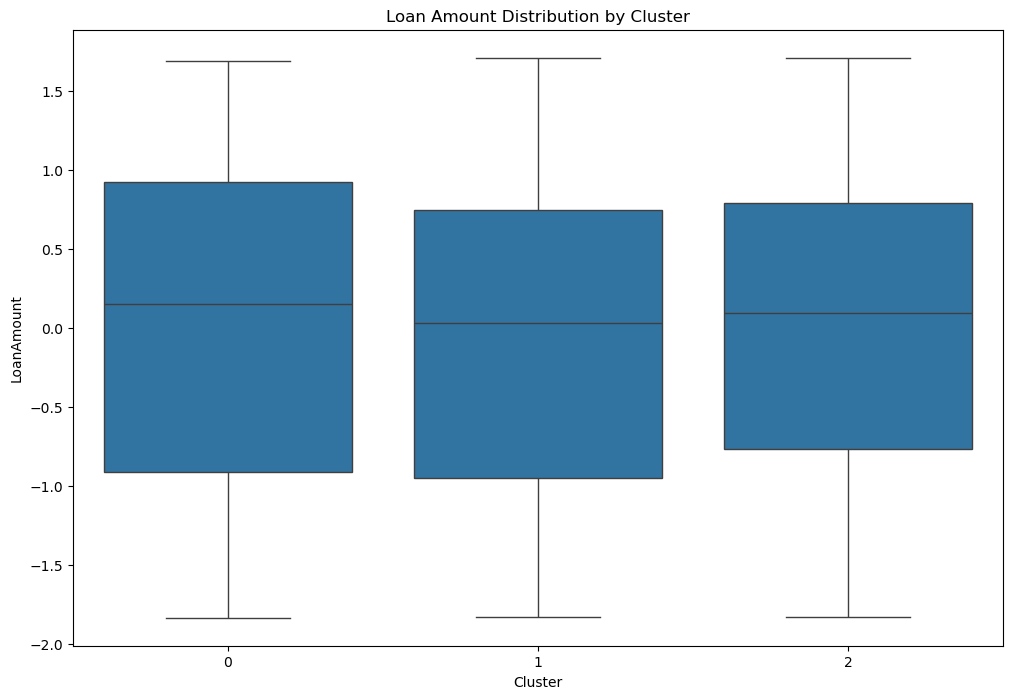

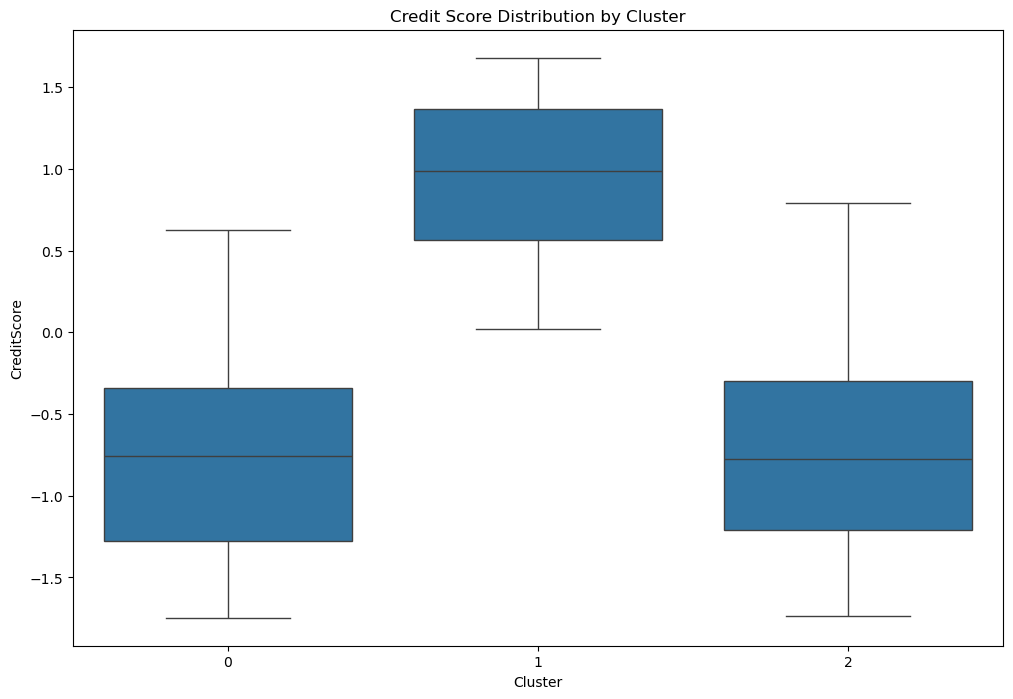

In [26]:
# Analyze the clusters further by examining the average values of key features within each cluster
clustered_data = pd.DataFrame(X_train_scaled, columns=X.columns)
clustered_data['Cluster'] = clusters

# Calculate the mean of each feature for each cluster
cluster_means = clustered_data.groupby('Cluster').mean()

# Display the cluster means
print(cluster_means)

# Visualize the distribution of a few key features within each cluster
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Income', data=clustered_data)
plt.title('Income Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='LoanAmount', data=clustered_data)
plt.title('Loan Amount Distribution by Cluster')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='CreditScore', data=clustered_data)
plt.title('Credit Score Distribution by Cluster')
plt.show()

## Insights and Recommendations

- The **Ridge Regression** model performed the best with an **R² score of 0.9907**, indicating a strong fit to the data.
- **Income** is the most important feature in predicting the risk score, followed by the **Income to Loan Ratio**.
- The **KMeans clustering** analysis suggests that there are three distinct groups in the data, which could represent different risk profiles.
- Consider focusing on improving the **credit score** and managing the **debt-to-income ratio** to reduce risk.
- Further analysis could explore the impact of different **age groups** and **credit score groups** on risk.
- The cluster analysis reveals distinct groups with varying characteristics in terms of **income, loan amount, and credit score**.
- **Cluster 0** seems to have higher income levels, while **Cluster 1** has higher credit scores.
- These insights can help in tailoring financial products or risk management strategies for different customer segments.
